<div style = "text-align:right"> Antoine Moulin & Alberto Begué</div>

# SD-TSIA 210
# Computer Lab: Training a neural network

<b>Lab's authors:</b> A. Garcia, A. Lambert, G. Staerman, G. Varni <br/>
<b>Date:</b> April 6, 2019

No deadline.

## 1. Training a neural network with keras

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

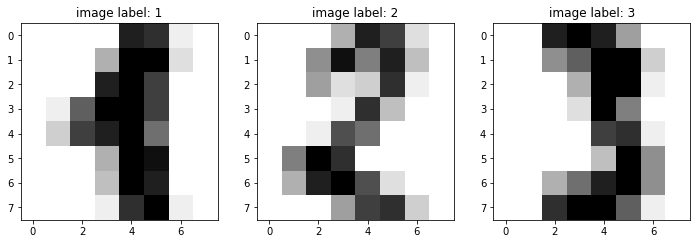

In [3]:
sample_index = np.array([11, 50, 62])
plt.figure(figsize=(12, 12))
for i in np.arange(sample_index.shape[0]):
    plt.subplot(131 + i)
    plt.imshow(digits.images[sample_index[i]], cmap=plt.cm.gray_r,
           interpolation='nearest')
    plt.title("image label: %d" % digits.target[sample_index[i]])
plt.show()

### Preprocessing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33)

# normalize the training set and apply the transformation to the train set
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

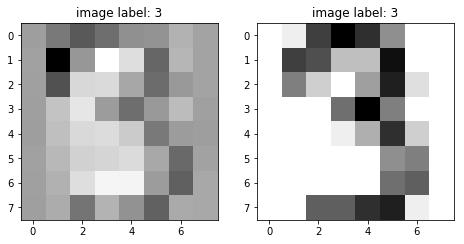

In [47]:
plt.figure(figsize=(12, 12))
# print a sample normalized
plt.subplot(131)
plt.imshow(X_train_scale[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("image label: %d" % y_train[0])

# print the original sample
plt.subplot(132)
original_sample = X_train_scale[0]*np.sqrt(scaler.var_) + scaler.mean_
plt.imshow(original_sample.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("image label: %d" % y_train[0])
plt.show()

In [48]:
from keras.utils import to_categorical

Y_train, Y_test = to_categorical(y_train), to_categorical(y_test)

Using TensorFlow backend.


This is needed because in the end, we will have a vector of probabilities with components between $0$ and $1$ and then we take the argmax as the predicted class. Besides, the formula of the cross entropy supposes that the real output is $0$ or $1$.

### Building and training the neural network

In [50]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

n_i = X_train.shape[1]
n_h = 5
n_o = 10

model = Sequential()
model.add(Dense(n_h, input_dim=n_i))
model.add(Activation("tanh"))
model.add(Dense(n_o))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1203/1203 [==============================] - 0s 253us/step - loss: 2.3265 - acc: 0.1588
Epoch 2/10
1203/1203 [==============================] - 0s 29us/step - loss: 2.1396 - acc: 0.1945
Epoch 3/10
1203/1203 [==============================] - 0s 25us/step - loss: 2.0235 - acc: 0.2577
Epoch 4/10
1203/1203 [==============================] - 0s 26us/step - loss: 1.9146 - acc: 0.2868
Epoch 5/10
1203/1203 [==============================] - 0s 26us/step - loss: 1.8227 - acc: 0.3150
Epoch 6/10
1203/1203 [==============================] - 0s 26us/step - loss: 1.7592 - acc: 0.3948
Epoch 7/10
1203/1203 [==============================] - 0s 28us/step - loss: 1.6971 - acc: 0.4356
Epoch 8/10
1203/1203 [==============================] - 0s 26us/step - loss: 1.6443 - acc: 0.4647
Epoch 9/10
1203/1203 [==============================] - 0s 25us/step - loss: 1.5917 - acc: 0.5278
Epoch 10/10
1203/1203 [==============================] - 0s 27us/step - loss: 1.5444 - acc: 0.5769


<h3> Question 3 </h3>

Show that minimizing the cross entropy loss is equivalent to maximizing the log-likelihood of the observations under a well chosent probabilistic model.

Let suppose that our observations follow a Bernoulli distribution. Then, for a probability $p$ obtained with our model, the probability that the output class is $y$ is given by

$$\mathbb{P} \left( y | p \right) = p^{y}(1 - p)^{1 - y}$$

The likelihood is given by :

$$\mathbb{P} \left( y | x \right) = \prod_{i=1}^{n} \mathbb{P} \left( y | x_{i} \right)^{y_{i}} \left( 1 - \mathbb{P} \left( y | x_{i} \right) \right)^{1 - y_{i}}$$

And the log-likelihood :

$$\log \mathbb{P} \left( y | x \right) = \sum_{i=1}^{n} y_{i} \log \mathbb{P} \left( y | x_{i} \right) + \left( 1 - y_{i} \right) \log \left( 1 - \mathbb{P} \left( y | x_{i} \right) \right)$$

Thus, we see that the cross entropy loss is given by $- \log \mathbb{P} \left( y | x \right)$. Then, minimizing the cross entropy loss is equivalent to maximizing the log-likelihood.

<h3> Question 4 </h3>

Play with the size of the hidden layer. How does the optimization process behave at fixed learning rate and epochs?

In [56]:
n_i = X_train.shape[1]
n_h = 20
n_o = 10

model = Sequential()
model.add(Dense(n_h, input_dim=n_i))
model.add(Activation("tanh"))
model.add(Dense(n_o))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1203/1203 [==============================] - 0s 164us/step - loss: 2.4981 - acc: 0.1812
Epoch 2/10
1203/1203 [==============================] - 0s 27us/step - loss: 2.0298 - acc: 0.3392
Epoch 3/10
1203/1203 [==============================] - 0s 28us/step - loss: 1.7371 - acc: 0.4422
Epoch 4/10
1203/1203 [==============================] - 0s 27us/step - loss: 1.5233 - acc: 0.5428
Epoch 5/10
1203/1203 [==============================] - 0s 27us/step - loss: 1.3516 - acc: 0.6367
Epoch 6/10
1203/1203 [==============================] - 0s 27us/step - loss: 1.2214 - acc: 0.6949
Epoch 7/10
1203/1203 [==============================] - 0s 28us/step - loss: 1.1188 - acc: 0.7440
Epoch 8/10
1203/1203 [==============================] - 0s 27us/step - loss: 1.0306 - acc: 0.7739
Epoch 9/10
1203/1203 [==============================] - 0s 28us/step - loss: 0.9600 - acc: 0.8121
Epoch 10/10
1203/1203 [==============================] - 0s 33us/step - loss: 0.8961 - acc: 0.8213


We see that the accuracy is higher if we increase the number of hidden units. But it is useless to have too much hidden units if the problem is quite simple.

<h3> Question 5 </h3>

Explain the following sentence: "Feed-forward neural networks with one hidden layer are known to be universal approximators". What are the requirements on the activation function for this to be true? How does the width of such a network evolves?

According to the universal approximation theorem, we can use a feed-forward network with a single hidden layer to approximate any continuous functions on compact subsets of $\mathbb{R}^{n}$, where $n \in \mathbb{N}$. For this purpose, we need the activation function to be nonconstant, bounded and continuous.

It has been shown recently that it actually works with the ReLU function and that the number of hidden units is limited by $n + 4$ if the input has a dimension $n$.

https://en.wikipedia.org/wiki/Universal_approximation_theorem

<h3> Question 6 </h3>

Set $n_{h} = 100$. Play with the learning rate: how does the optimization process behave when the learning rate is too high/too low?

In [68]:
n_i = X_train.shape[1]
n_h = 100
n_o = 10

model = Sequential()
model.add(Dense(n_h, input_dim=n_i))
model.add(Activation("tanh"))
model.add(Dense(n_o))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1203/1203 [==============================] - 0s 314us/step - loss: 0.9695 - acc: 0.7124
Epoch 2/10
1203/1203 [==============================] - 0s 35us/step - loss: 0.2960 - acc: 0.9293
Epoch 3/10
1203/1203 [==============================] - 0s 32us/step - loss: 0.1648 - acc: 0.9726
Epoch 4/10
1203/1203 [==============================] - 0s 31us/step - loss: 0.1327 - acc: 0.9726
Epoch 5/10
1203/1203 [==============================] - 0s 32us/step - loss: 0.0896 - acc: 0.9867
Epoch 6/10
1203/1203 [==============================] - 0s 32us/step - loss: 0.0711 - acc: 0.9917
Epoch 7/10
1203/1203 [==============================] - 0s 31us/step - loss: 0.0604 - acc: 0.9909
Epoch 8/10
1203/1203 [==============================] - 0s 35us/step - loss: 0.0518 - acc: 0.9950
Epoch 9/10
1203/1203 [==============================] - 0s 30us/step - loss: 0.0421 - acc: 0.9967
Epoch 10/10
1203/1203 [==============================] - 0s 30us/step - loss: 0.0355 - acc: 0.9975


When the learning rate is too high, the precision is really low because the step is too large. However, the training is faster. When the learning rate is too low, the optimization does not give the minimum if the number of steps is not enough. Thus, the convergence is lower.

<h3> Question 7 </h3>

Test different optimization techniques (https://keras.io/optimizers/). What is the main difference between Adam and Adadelta?

In [73]:
n_i = X_train.shape[1]
n_h = 100
n_o = 10

model = Sequential()
model.add(Dense(n_h, input_dim=n_i))
model.add(Activation("tanh"))
model.add(Dense(n_o))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1203/1203 [==============================] - 1s 425us/step - loss: 1.7534 - acc: 0.4422
Epoch 2/10
1203/1203 [==============================] - 0s 34us/step - loss: 0.8067 - acc: 0.8337
Epoch 3/10
1203/1203 [==============================] - 0s 33us/step - loss: 0.5001 - acc: 0.9185
Epoch 4/10
1203/1203 [==============================] - 0s 32us/step - loss: 0.3518 - acc: 0.9485
Epoch 5/10
1203/1203 [==============================] - 0s 33us/step - loss: 0.2700 - acc: 0.9643
Epoch 6/10
1203/1203 [==============================] - 0s 32us/step - loss: 0.2161 - acc: 0.9692
Epoch 7/10
1203/1203 [==============================] - 0s 33us/step - loss: 0.1786 - acc: 0.9726
Epoch 8/10
1203/1203 [==============================] - 0s 36us/step - loss: 0.1523 - acc: 0.9800
Epoch 9/10
1203/1203 [==============================] - 0s 35us/step - loss: 0.1317 - acc: 0.9825
Epoch 10/10
1203/1203 [==============================] - 0s 35us/step - loss: 0.1131 - acc: 0.9842


## 2. Training a neural network with numpy

Start by implementing the softmax function, sigmoid and its derivative, as well as negative log-likelihood:

In [4]:
def softmax(X):
    # TODO:
    return None

def sigmoid(X):
    # TODO
    return None

def dsigmoid(X):
    # TODO
    return None

def nll(Y_true, Y_pred):
    # TODO
    return None

You can complete the following python class to get your numpy network. This class is designed to be "scikit like", meaning that once it has been correctly completed, you can just execute 

-model = NeuralNet(n_features, n_hidden, n_classes); model.fit(X_train,Y_train,lr=0.1, n_epochs=20)

to get it to work. Hints about how to fill the methods can be found in the pdf subject.

In [ ]:
class NeuralNet():
    """MLP with 1 hidden layer and a sigmoid activation"""
    
    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = None
        self.b_h = None
        self.W_o = None
        self.b_o = None
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        return y
    
    def forward_with_hidden(self, X):
        # TODO
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return L

    def grad_loss(self, x, y_true):
        # TODO
        return grads

    def train_sample(self, x, y, lr):
        # TODO

    def fit(self, X_train, Y_train , lr, n_epochs):
        # TODO
        return losses
    
    def predict(self, X):
        # TODO
        return 

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)